##Data presentation 
This project is analyzing data of the five largest most popular tech stocks FAANG which are Facebook, Apple, Amazon, Netflix and Google and comparing it to S&P-500. We illustrate the historical relationship between volatility and average returns and assess whether active stock-picking would have been beneficial over the last five years.

In [1]:
#Import stok data from IEX
import pandas as pd 
import pandas_datareader
import datetime
import matplotlib.pyplot as plt

start = datetime.datetime(2014,1,1)
end   = datetime.datetime(2019,1,1)

firms = [] 
for i,stock_name in enumerate(['FB','AAPL', 'GOOGL', 'NFLX', 'AMZN', 'SPY']): 
    firm_stock = pandas_datareader.iex.daily.IEXDailyReader(stock_name, start, end).read()
    firm_stock['firm'] = stock_name
    firms.append(firm_stock)

stocks = pd.concat(firms)

# Convert index from type 'O' to 'datetime' 
stocks.index = pd.to_datetime(stocks.index)

# Mean Closing Price Calculation 
stocks.groupby('firm').mean()

,open,high,low,close,volume
firm,,,,,
AAPL,130.123419,131.244452,128.976067,130.133062,4.016340e+07
AMZN,861.936559,870.222509,851.956490,861.398497,4.207946e+06
FB,125.142968,126.379527,123.853039,125.186130,2.589548e+07
GOOGL,821.253774,828.183012,813.627782,821.061237,1.944077e+06
NFLX,154.607048,156.963415,152.022141,154.565741,1.299899e+07
SPY,218.005803,218.951313,216.942924,218.007960,1.000152e+08


##Empirical Analysis 
To do so, we have been using trade data from The Investors Exchange containing open, high, low, close and volume for the period April 1st, 2014 to January 1st, 2019. Table 1(under data description) presents the mean prices for FAANG + S&P-500 in USD.

Figure 1 shows the closing price evolution for Facebook, Apple, Amazon, Netflix, Google and S&P-500 from April 1st, 2014 to January 1st, 2019. The general tendency is that the closing prices i.e. the stock values are increasing over the period.

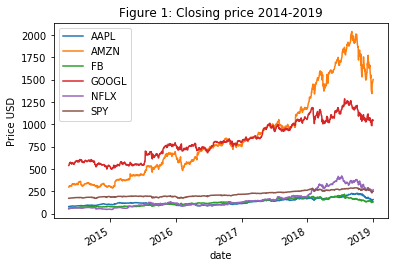

In [2]:
#Plot Raw Data - absolute growth for each stock
fig,ax = plt.subplots()
stocks.groupby('firm')['close'].plot(legend=True);
ax.set_ylabel('Price USD');
ax.set_title('Figure 1: Closing price 2014-2019');

In the first period from 2014-2017 stocks closing prices are growing steadily. From 2017 to mid-2018 the growth increases for all the stocks before the FAANG stocks suddenly decreases by more than 20 pct. The reason for the decrease in mid-2018 is as shown as S&P-500 in the graph generally decreases due to fear that the nine-year bull market was losing steam. However, the tech stocks that had been seen as a safe bet decreased even more than the general market due to disappointing market forecasts, which lead to fear of a new tech bubble.<br>
The main positive outlier is Amazon which experiences much higher growth rates than the other stocks but also a steeper decline in absolute values.<br>
The main negative outlier is Facebook who suffered especially hard with the stock falling more than 38 pct. From its all-time high in July, this was due to scandals regarding data breaches and general immoral business tactics coupled together with slowing growths.

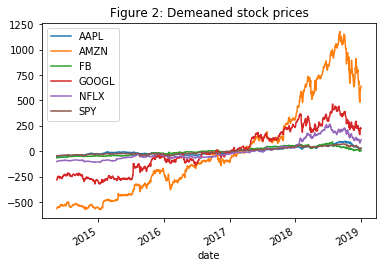

In [3]:
#Plot Demeaned Data
stocks3 = stocks.copy()

# Split - Apply - Combine (de-meaning)
stocks3['close_demeaned'] = stocks3.groupby('firm')['close'].transform(lambda x: x - x.mean())

# Plot
stocks3.groupby('firm')['close_demeaned'].plot(legend=True);
plt.title('Figure 2: Demeaned stock prices');

Figure 2 shows the demeaned stock prices. The demeaned stock prices are found by subtracting the sample mean from each observation for each stock and S&P-500, which makes it possible to look at the stock deviations from the mean, which in figure 2 is illustrated as zero. It is noted that both Amazon and Google are quite volatile around their own means whereas the remaining stocks are more centered around their own means - volatility is a measure of dispersion around the mean or average return of a security. The standard deviation for each stock and S&P-500 has been calculated in Table 3, which shows standard deviation of the closing price in the period 2014 to 2019.

In [6]:
#Calculating the standard deviation for each stock
print(stocks3.groupby('firm')['close'].std())

firm
AAPL      36.960497
AMZN     475.704568
FB        39.303316
GOOGL    212.389259
NFLX      96.542952
SPY       34.215521
Name: close, dtype: float64


The results are that Apple€™s standard deviation is 38, Amazons is 478, Facebooks is 40, Googles is 214, Netflixs is 97 and S&P-500s is 35. The results from Amazon and Google are in line with our results from Figure 2 which showed that they were the two most volatile stocks. The results also show that S&P-500 has the lowest standard deviation which supports our financial theory that a lower expected return should yield a lower standard deviation, which also can be seen in figure 4 where Netflix and Amazon have had a growth rate above 400 pr. Cent and nearly 350 pr. Cent respectively. While S&P-500 have had the lowest growth rate for the same time period just below 50 pct.

Comparing the table with standard deviation and figure 4, note especially Google: this stock has a relative high standard deviation but comes with the lowest growth rate for the FAANG-stocks, implying high risk â€“ low return. Google has only grown less than double of the safest stock S&P-500, whereas Netflix has the highest growth rate but with much lower standard deviation making this stock much preferable compared to Google. Lastly we note that Apple and S&P-500 have the lowest and somehow the same standard deviation but Apple has grown almost the double of S&P-500. This imply that you can get almost the double return for the same risk as S&P-500 stock-picking Apple.

In [7]:
#Find first and last closing price for all stocks to obtain Figure 4
print(firms)

[              open      high       low     close    volume firm
date                                                           
2014-05-19   57.89   59.5600   57.5700   59.2100  43033925   FB
2014-05-20   59.50   60.1900   58.1800   58.5600  53931469   FB
2014-05-21   58.56   60.5000   58.2500   60.4900  58991505   FB
2014-05-22   60.94   61.4800   60.4000   60.5200  54200116   FB
2014-05-23   60.41   61.4500   60.1500   61.3510  38293993   FB
2014-05-27   61.62   63.5100   61.5700   63.4800  55681663   FB
2014-05-28   63.39   64.1400   62.6200   63.5100  47795088   FB
2014-05-29   63.84   64.3000   63.5100   63.8300  42699670   FB
2014-05-30   63.95   64.1700   62.5600   63.3000  45283577   FB
2014-06-02   63.23   63.5900   62.0500   63.0800  35995537   FB
2014-06-03   62.62   63.4200   62.3200   62.8700  32216707   FB
2014-06-04   62.45   63.5900   62.0700   63.3400  36513991   FB
2014-06-05   63.66   64.3600   62.8200   63.1860  47352368   FB
2014-06-06   63.37   63.4800   62.1500 

In [9]:
#Use first and last observation of each stock to calculate growth rate over the period. 

# Growth rate 2014-2019 Facebook
x_first = 62.62
x_last = 131.09
growth_rate_FB = (x_last - x_first)/x_first * 100
print(growth_rate_FB)

109.34206323858193


In [10]:
# Growth rate 2014-2019 Apple
x_first = 71.1359
x_last = 157.0663
growth_rate_AAPL = (x_last - x_first)/x_first * 100
print(growth_rate_AAPL)

120.79751574099716


In [11]:
# Growth rate 2014-2019 Google
x_first = 568.0124
x_last = 1044.9600
growth_rate_GOOGL = (x_last - x_first)/x_first * 100
print(growth_rate_GOOGL)

83.96781478714199


In [12]:
# Growth rate 2014-2019 Amazon
x_first = 342.990
x_last = 1501.970
growth_rate_AMZN = (x_last - x_first)/x_first * 100
print(growth_rate_AMZN)

337.9048951864486


In [13]:
# Growth rate 2014-2019 Netflix
x_first = 52.0985
x_last = 267.66
growth_rate_NFLX = (x_last - x_first)/x_first * 100
print(growth_rate_NFLX)

413.7575937886887


In [14]:
# Growth rate 2014-2019 SP500
x_first = 170.4958
x_last = 248.8239
growth_rate_SPY = (x_last - x_first)/x_first * 100
print(growth_rate_SPY)

45.941366297586214


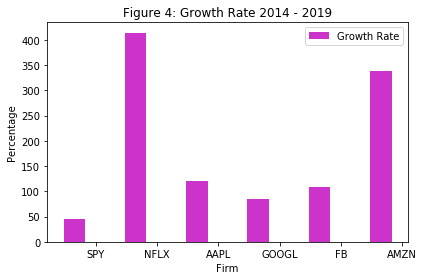

In [15]:
#Plot the growth rates against each other 

import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 6
growth_rate = (growth_rate_SPY, growth_rate_NFLX, growth_rate_AAPL, growth_rate_GOOGL, growth_rate_FB, growth_rate_AMZN)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, growth_rate, bar_width,
alpha=opacity,
color='m',
label='Growth Rate')
 
plt.xlabel('Firm')
plt.ylabel('Percentage')
plt.title('Figure 4: Growth Rate 2014 - 2019')
plt.xticks(index + bar_width, ('SPY', 'NFLX', 'AAPL', 'GOOGL', 'FB', 'AMZN'))
plt.legend()
 
plt.tight_layout()
plt.show()

Further looking at figure 3, which show the first-difference we clearly see that Google and Amazon shows biggest differences, which support our conclusion that these stocks are more unsafe implying a higher risk if stock-picking comparing to choosing the other FAANG-stocks or the S&P-500 index. Especially for the last observations the risk becomes higher.

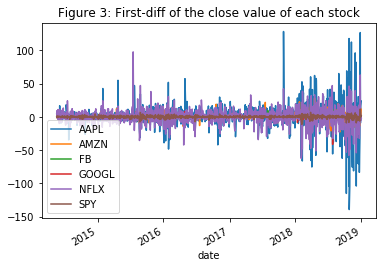

In [16]:
#Using df.groupby('firm').var.diff(1) to calculate the first differences of closing prices. 
stocks['diff_close'] = stocks.groupby('firm').close.diff(1)
stocks.groupby('firm')['diff_close'].plot(legend=True);
plt.title('Figure 3: First-diff of the close value of each stock');

##Conclusion 
We find that there exists a trade-off between volatility and return in line with what standard financial theory predicts. This implies that your portfolio could have beaten the S&P-500 index over the five-year period 2014 to 2019 by stock-picking single FAANG assets. However, the higher returns come with higher volatility, which is for the person to choose what degree of risk averse he/she is.